# Introduction

In this project, we will work with data from the **S&P500** Index. The S&P500 is a stock market index. 

Some companies are publicly traded, which means that anyone can buy and sell their shares on the open market. A share entitles the owner to some control over the direction of the company and to a percentage (or share) of the earnings of the company. When you buy or sell shares, it's common known as **trading a stock**.

**The price of a share is based on supply and demand** for a given stock. For example, Apple stock has a price of 120 dollars per share as of December 2015 -- http://www.nasdaq.com/symbol/aapl. A stock that is in less demand, like Ford Motor Company, has a lower price -- http://finance.yahoo.com/q?s=F. Stock price is also influenced by other factors, including the number of shares a company has issued.

Stocks are traded daily and the price can rise or fall from the beginning of a trading day to the end based on demand. Stocks that are in more in demand, such as Apple, are traded more often than stocks of smaller companies.

Indexes aggregate the prices of multiple stocks together, and allow you to see how the market as a whole performs. For example, the Dow Jones Industrial Average aggregates the stock prices of 30 large American companies together. The S&P500 Index aggregates the stock prices of 500 large companies. When an index fund goes up or down, you can say that the primary market or sector it represents is doing the same. For example, if the Dow Jones Industrial Average price goes down one day, you can say that American stocks overall went down (ie, most American stocks went down in price).

We will be using **historical data** on the price of the **S&P500** Index to make **predictions** about **future prices**. Predicting whether an index goes up or down helps forecast how the stock market as a whole performs. Since stocks tend to correlate with how well the economy as a whole is performs, it can also help with economic forecasts.

# Dataset overview

Each row in the file contains a **daily record** of the price of the **S&P500 Index from 1950 to 2015**. 

<ul>
    <li><b>Date --</b> The date of the record.</li>
    <li><b>Open --</b> The opening price of the day (when trading starts).</li>
    <li><b>High --</b> The highest trade price during the day.</li>
    <li><b>Low --</b> The lowest trade price during the day.</li>
    <li><b>Close --</b> The closing price for the day (when trading is finished).</li>
    <li><b>Volume --</b> The number of shares traded.</li>
    <li><b>Adj Close --</b> The daily closing price, adjusted retroactively to include any corporate actions.</li>
</ul>

# Results Summary

# Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Functions

# Data Overview

In [280]:
df = pd.read_csv('sphist.csv', low_memory=False)

In [281]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
...,...,...,...,...,...,...,...
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000


In [282]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,16590.000000,16590.000000,16590.000000,16590.000000,1.659000e+04,16590.000000
mean,482.570941,485.624237,479.367501,482.692491,7.940099e+08,482.692491
std,554.889186,558.186049,551.367625,555.007904,1.456582e+09,555.007904
min,16.660000,16.660000,16.660000,16.660000,6.800000e+05,16.660000
25%,83.860001,84.594997,83.139997,83.860001,7.610000e+06,83.860001
50%,144.049995,145.294998,143.105004,144.264999,7.170500e+07,144.264999
75%,950.722488,956.665024,941.969986,950.797500,7.866750e+08,950.797500
max,2130.360107,2134.719971,2126.060059,2130.820068,1.145623e+10,2130.820068


In [283]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

As we can see all columns match the previous description being numeric.

In [284]:
df.Date = pd.to_datetime(df.Date)

In [285]:
df = df.sort_values(by='Date', ascending=True)

In [286]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000
...,...,...,...,...,...,...,...
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941


## Generating indicators

In this section the following indicators will be created:
    
The average volume over the past five days. x

The average volume over the past year. x

The ratio between the average volume for the past five days, and the average volume for the past year. x

The standard deviation of the average volume over the past five days. 

The standard deviation of the average volume over the past year.

The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year. x

The year component of the date. x

The ratio between the lowest price in the past year and the current price.

The ratio between the highest price in the past year and the current price.

The month component of the date. x

The day of week. x

The day component of the date. x

The number of holidays in the prior month.

In [287]:
def create_indicator(df, column, indicator, days, function):
    # Makes a series of Close price with the dates as indexes
    s = pd.Series(np.array(df[column]), index=np.array(df["Date"]))
    
    # Calculates the mean price of past days
    means = s.rolling(window = days).apply(np.mean)
        
    # Shift indices to exclude the price of each day from the mean value
    means = means.shift()
    
    # Converts indices to Date
    means = means.reset_index()
    means = means.rename(columns={'index':'Date', 0:indicator})
    
    df_new = df.merge(means, left_on="Date", right_on="Date")
    return df_new
    

### Close value last days averages

In [288]:
df = create_indicator(df, 'Close', 'last_5_days_mean', 5, np.mean)
df = create_indicator(df, 'Close', 'last_30_days_mean', 30, np.mean)
df = create_indicator(df, 'Close', 'last_365_days_mean', 365, np.mean)

In [289]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343


Check days with missing data are not computed

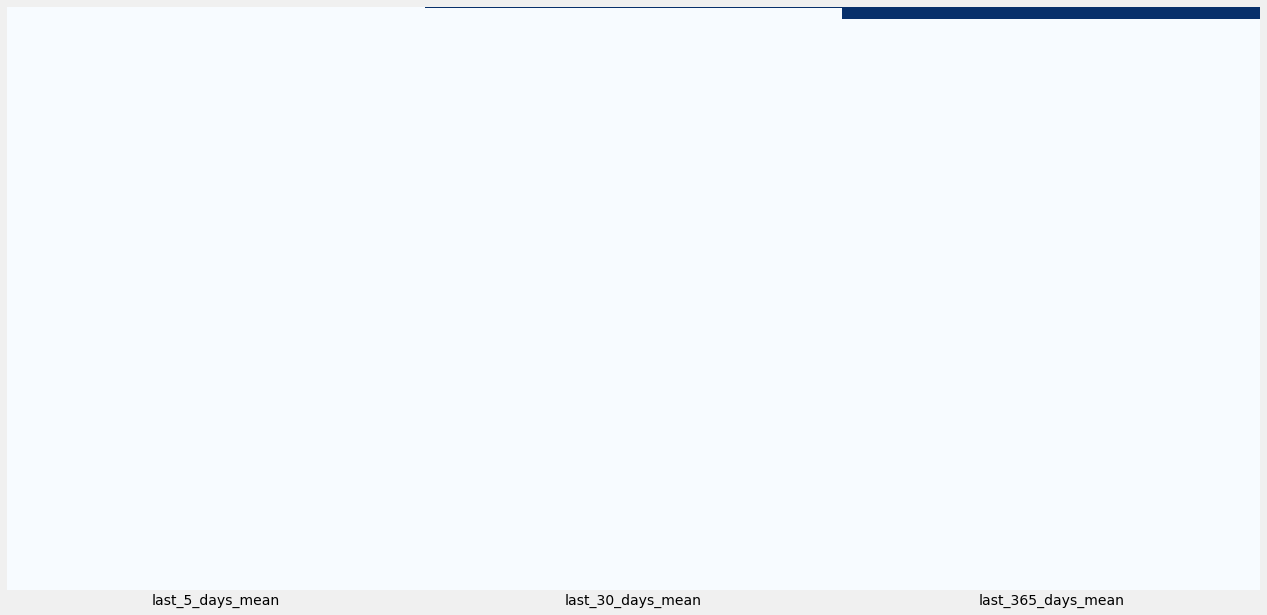

In [290]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
sns.heatmap(df[["last_5_days_mean", 
               "last_30_days_mean", 
               "last_365_days_mean"]].isnull(), cbar=False, yticklabels=False, cmap="Blues")
plt.show()

As we can see the maximum number of missing averages on days is for the last 365 days mean indicator and minimum for the last 5.

All the rows befrore **1951-01-03** will be removed.

In [291]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Adj Close               0
last_5_days_mean        5
last_30_days_mean      30
last_365_days_mean    365
dtype: int64

### Volume value last days averages

In [292]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343


In [293]:
df = create_indicator(df, 'Volume', 'last_5_days_volume_mean', 5, np.mean)
df = create_indicator(df, 'Volume', 'last_30_days_volume_mean', 30, np.mean)
df = create_indicator(df, 'Volume', 'last_365_days_volume_mean', 365, np.mean)

In [294]:
df.isnull().sum()

Date                           0
Open                           0
High                           0
Low                            0
Close                          0
Volume                         0
Adj Close                      0
last_5_days_mean               5
last_30_days_mean             30
last_365_days_mean           365
last_5_days_volume_mean        5
last_30_days_volume_mean      30
last_365_days_volume_mean    365
dtype: int64

### Date data engineering

In [295]:
df["day_of_date"] = df["Date"].dt.day
df["month_of_date"] = df["Date"].dt.month
df["year_of_date"] = df["Date"].dt.year
df["day_of_week"] = df["Date"].dt.dayofweek
df["day_of_year"] = df["Date"].dt.dayofyear
df["day_of_year"] = df["Date"].dt.dayofyear
df["quarter_of_year"] = df["Date"].dt.quarter

In [296]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,last_5_days_volume_mean,last_30_days_volume_mean,last_365_days_volume_mean,day_of_date,month_of_date,year_of_date,day_of_week,day_of_year,quarter_of_year
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1950,1,3,1
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,NaN,NaN,NaN,4,1,1950,2,4,1
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,NaN,NaN,NaN,5,1,1950,3,5,1
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,NaN,NaN,NaN,6,1,1950,4,6,1
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,NaN,NaN,NaN,9,1,1950,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,3.207544e+09,3.842181e+09,3.527800e+09,1,12,2015,1,335,4
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,3.232372e+09,3.856341e+09,3.526090e+09,2,12,2015,2,336,4
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,3.245514e+09,3.876979e+09,3.529468e+09,3,12,2015,3,337,4
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,3.536224e+09,3.899603e+09,3.532802e+09,4,12,2015,4,338,4


### Ratios

The ratio between the average price for the past 5 days, and the average price for the past 365 days.

In [297]:
df['ratio_5365_average_close'] = df['last_5_days_mean'] / df['last_365_days_mean']

The ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.

In [298]:
df = create_indicator(df, 'Close', 'std_close_5', 5, np.std)
df = create_indicator(df, 'Close', 'std_close_365', 365, np.std)

In [299]:
df['ratio_5365_std_close'] = df['std_close_5'] / df['std_close_365']

In [300]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,...,day_of_date,month_of_date,year_of_date,day_of_week,day_of_year,quarter_of_year,ratio_5365_average_close,std_close_5,std_close_365,ratio_5365_std_close
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,...,3,1,1950,1,3,1,NaN,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,...,4,1,1950,2,4,1,NaN,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,...,5,1,1950,3,5,1,NaN,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,...,6,1,1950,4,6,1,NaN,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,...,9,1,1950,0,9,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,...,1,12,2015,1,335,4,1.025297,2087.024023,2035.531178,1.025297
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,...,2,12,2015,2,336,4,1.026680,2090.231982,2035.914082,1.026680
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,...,3,12,2015,3,337,4,1.025573,2088.306006,2036.234356,1.025573
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,...,4,12,2015,4,338,4,1.021580,2080.456006,2036.507343,1.021580


The standard deviation of the average volume over the past five days.

The standard deviation of the average volume over the past year.

In [301]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,...,day_of_date,month_of_date,year_of_date,day_of_week,day_of_year,quarter_of_year,ratio_5365_average_close,std_close_5,std_close_365,ratio_5365_std_close
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,...,3,1,1950,1,3,1,NaN,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,...,4,1,1950,2,4,1,NaN,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,...,5,1,1950,3,5,1,NaN,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,...,6,1,1950,4,6,1,NaN,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,...,9,1,1950,0,9,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,...,1,12,2015,1,335,4,1.025297,2087.024023,2035.531178,1.025297
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,...,2,12,2015,2,336,4,1.026680,2090.231982,2035.914082,1.026680
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,...,3,12,2015,3,337,4,1.025573,2088.306006,2036.234356,1.025573
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,...,4,12,2015,4,338,4,1.021580,2080.456006,2036.507343,1.021580


In [302]:
df = create_indicator(df, 'last_5_days_volume_mean', 'std_volume_5', 5, np.std)
df = create_indicator(df, 'last_365_days_volume_mean', 'std_volume_365', 365, np.std)

In [303]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,...,year_of_date,day_of_week,day_of_year,quarter_of_year,ratio_5365_average_close,std_close_5,std_close_365,ratio_5365_std_close,std_volume_5,std_volume_365
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,...,1950,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,...,1950,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,...,1950,3,5,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,...,1950,4,6,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,...,1950,0,9,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,...,2015,1,335,4,1.025297,2087.024023,2035.531178,1.025297,3.668599e+09,3.357565e+09
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,...,2015,2,336,4,1.026680,2090.231982,2035.914082,1.026680,3.524000e+09,3.358041e+09
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,...,2015,3,337,4,1.025573,2088.306006,2036.234356,1.025573,3.390498e+09,3.358506e+09
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,...,2015,4,338,4,1.021580,2080.456006,2036.507343,1.021580,3.281320e+09,3.358987e+09


The ratio between the lowest price in the past year and the current price.

The ratio between the highest price in the past year and the current price.

In [305]:
def find_extrem_prices(row, df, type_='max'):
    year = row['year_of_date']
    if year != df['year_of_date'].min():
        if type_=='max':
            return df[df['year_of_date']==year-1]["Close"].max()        
        else:
            return df[df['year_of_date']==year-1]["Close"].min()    
    else: 
        return 0

In [310]:
df["past_year_highest_price"] = df.apply(lambda x: find_extrem_prices(x, df), axis=1)
df["past_year_lowest_price"] = df.apply(lambda x: find_extrem_prices(x, df, type_='min'), axis=1)

In [312]:
df['min_price_ratio'] = df["past_year_lowest_price"] / df["Close"] 
df['max_price_ratio'] = df["past_year_highest_price"] / df["Close"] 

In [313]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,last_5_days_mean,last_30_days_mean,last_365_days_mean,...,ratio_5365_average_close,std_close_5,std_close_365,ratio_5365_std_close,std_volume_5,std_volume_365,past_year_highest_price,past_year_lowest_price,min_price_ratio,max_price_ratio
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,16.660000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,16.850000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,16.930000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,16.980000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,17.080000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2087.024023,2073.984998,2035.531178,...,1.025297,2087.024023,2035.531178,1.025297,3.668599e+09,3.357565e+09,2090.570068,1741.890015,0.828434,0.994264
16586,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2090.231982,2076.283993,2035.914082,...,1.026680,2090.231982,2035.914082,1.026680,3.524000e+09,3.358041e+09,2090.570068,1741.890015,0.837644,1.005319
16587,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2088.306006,2077.908659,2036.234356,...,1.025573,2088.306006,2036.234356,1.025573,3.390498e+09,3.358506e+09,2090.570068,1741.890015,0.849860,1.019979
16588,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2080.456006,2078.931331,2036.507343,...,1.021580,2080.456006,2036.507343,1.021580,3.281320e+09,3.358987e+09,2090.570068,1741.890015,0.832767,0.999465


### Number of holidays

In [316]:
pip install holidays

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 165 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 5.4 MB 7.3 MB/s eta 0:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730974 sha256=456a60f429ba134740d7b0210ca5e37f6e7bd7a481a3fdcdfed17f448b2ad24d
  Stored in directory: /home/radu/.cache/pip/wheels/a0/8b/b2/810ae5a6f970c8be4725353400d643c90de1c0f023a9884ee7
Successfully built pymeeus
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [317]:
import holidays

In [322]:
h = holidays.CountryHoliday('USA', state=None)

In [325]:
for x in h: 
    print(x)

In [243]:
df_updated = df[df["Date"] > datetime(year=1951, month=1, day=2)]
df_updated = df_updated.dropna(axis=0)

In [244]:
df_updated.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Volume                       0
Adj Close                    0
last_5_days_mean             0
last_30_days_mean            0
last_365_days_mean           0
last_5_days_volume_mean      0
last_30_days_volume_mean     0
last_365_days_volume_mean    0
day_of_date                  0
month_of_date                0
year_of_date                 0
day_of_week                  0
day_of_year                  0
quarter_of_year              0
ratio_5365_average_close     0
std_close_5                  0
std_close_365                0
ratio_5365_std_close         0
dtype: int64

### Correlations

In [246]:
df_updated.corr()["Close"]

Open                         0.999900
High                         0.999953
Low                          0.999956
Close                        1.000000
Volume                       0.772817
Adj Close                    1.000000
last_5_days_mean             0.999793
last_30_days_mean            0.999189
last_365_days_mean           0.988870
last_5_days_volume_mean      0.780896
last_30_days_volume_mean     0.786908
last_365_days_volume_mean    0.784878
day_of_date                 -0.001525
month_of_date                0.005684
year_of_date                 0.872100
day_of_week                  0.003327
day_of_year                  0.005379
quarter_of_year              0.005578
ratio_5365_average_close     0.047782
std_close_5                  0.999793
std_close_365                0.988870
ratio_5365_std_close         0.047782
Name: Close, dtype: float64

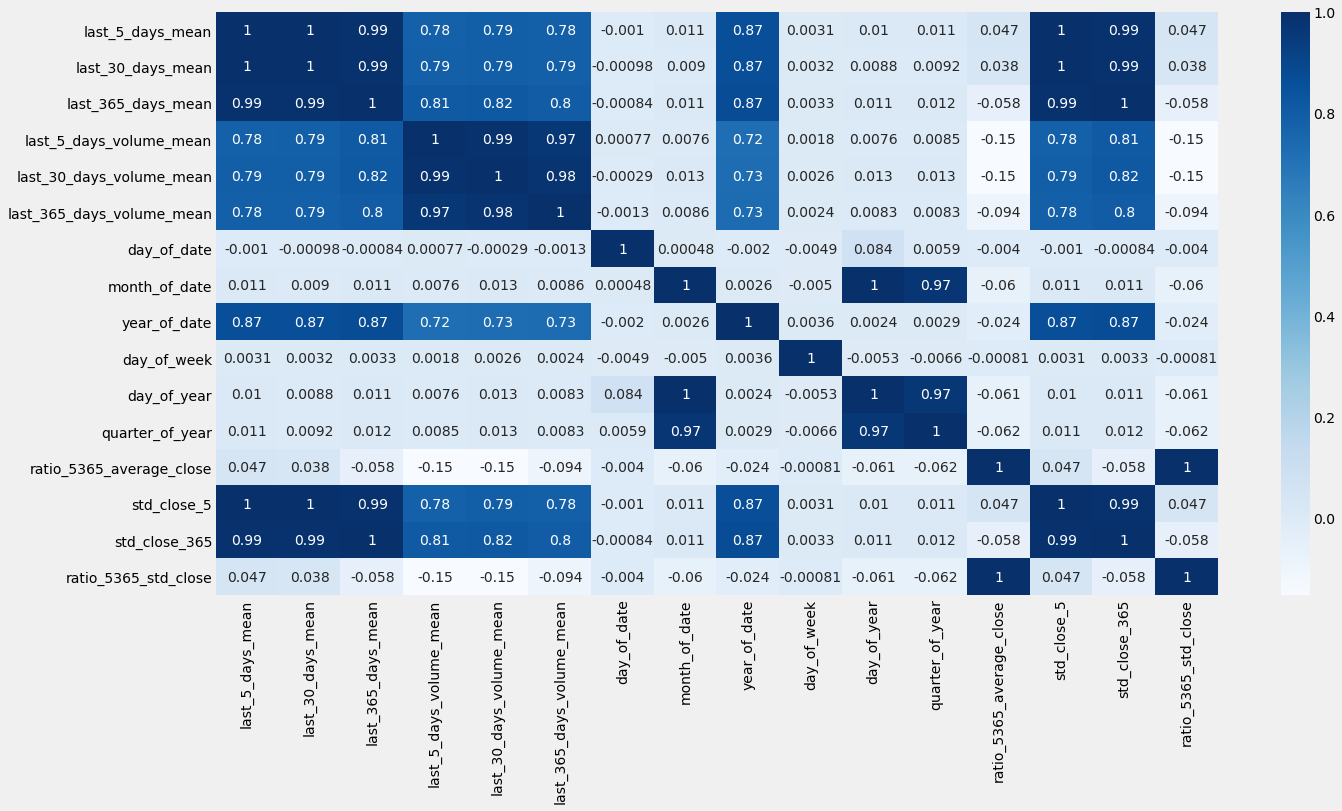

In [251]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
sns.heatmap(df[['last_5_days_mean',
 'last_30_days_mean',
 'last_365_days_mean',
 'last_5_days_volume_mean',
 'last_30_days_volume_mean',
 'last_365_days_volume_mean',
 'day_of_date',
 'month_of_date',
 'year_of_date',
 'day_of_week',
 'day_of_year',
 'quarter_of_year',
 'ratio_5365_average_close',
 'std_close_5',
 'std_close_365',
 'ratio_5365_std_close']].corr(), annot=True, cmap="Blues")
plt.show()

# Algorithm implementation

## Train test split

We are going to generate two new dataframes to use in making our algorithm.
<ul>
    <li><b>train --</b> should contain any rows in the data with a date less than 2013-01-01.</li>
    <li><b>test --</b>  should contain any rows with a date greater than or equal to 2013-01-01.</li>
</ul>

In [191]:
def split_by_date(df, date_column, date):
    train = df[df[date_column] < date]
    test = df[df[date_column] >= date]
    
    return train, test

In [192]:
train, test = split_by_date(df_updated, 'Date', datetime(year=2013, month=1, day=1))

## Linear Regression

Then the **Linear Regression** model will be used to train the train dataset and predict the test dataset. The **root of mean squared error (RMSE)** is also calculated to represent the forecast error.

In [193]:
def get_linear_regression_error(train, test, features, target):
    
    lr_model = LinearRegression()
    
    #Train
    lr_model.fit(train[features], train[target])
    
    #Test
    predictions = lr_model.predict(test[features])
    
    #Error
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    return rmse, predictions

In [194]:
def create_line_plot(x, y, y2, rmse, sigbar_x=-1):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
    ax = sns.lineplot(y=y, x=x, label="Real Value")
    ax2 = sns.lineplot(y=y2, x=x, label="Prediction RMSE="+str(round(rmse, 2)))
    
    ax.set_ylabel("Close") 
    ax.set_xlabel("Date", fontsize = "large")
    ax.set_title("Predictions vs Real Value", fontsize = "x-large")
    # Generate a bolded horizontal line at y = 0
#     plt.axhline(y=min(y.min(), y2.min())-50, 
#                 color='black', 
#                 linewidth=1,)
    # The signature bar
#     plt.text(x = 0.01, 
#              y = 0.01,
#              s = ' ©Radu Spaimoc                                                                                                                                                                                                                                             Source: www.https://github.com/freeCodeCamp/',
#              fontsize = 14,
#              color = '#f0f0f0',
#              backgroundcolor = 'grey')
    plt.show()  

In [195]:
def print_rmse_message(rmse):
    print("RMSE: ", round(rmse, 2))


In [196]:
features = ['last_5_days_mean', 'last_30_days_mean', 'last_365_days_mean']

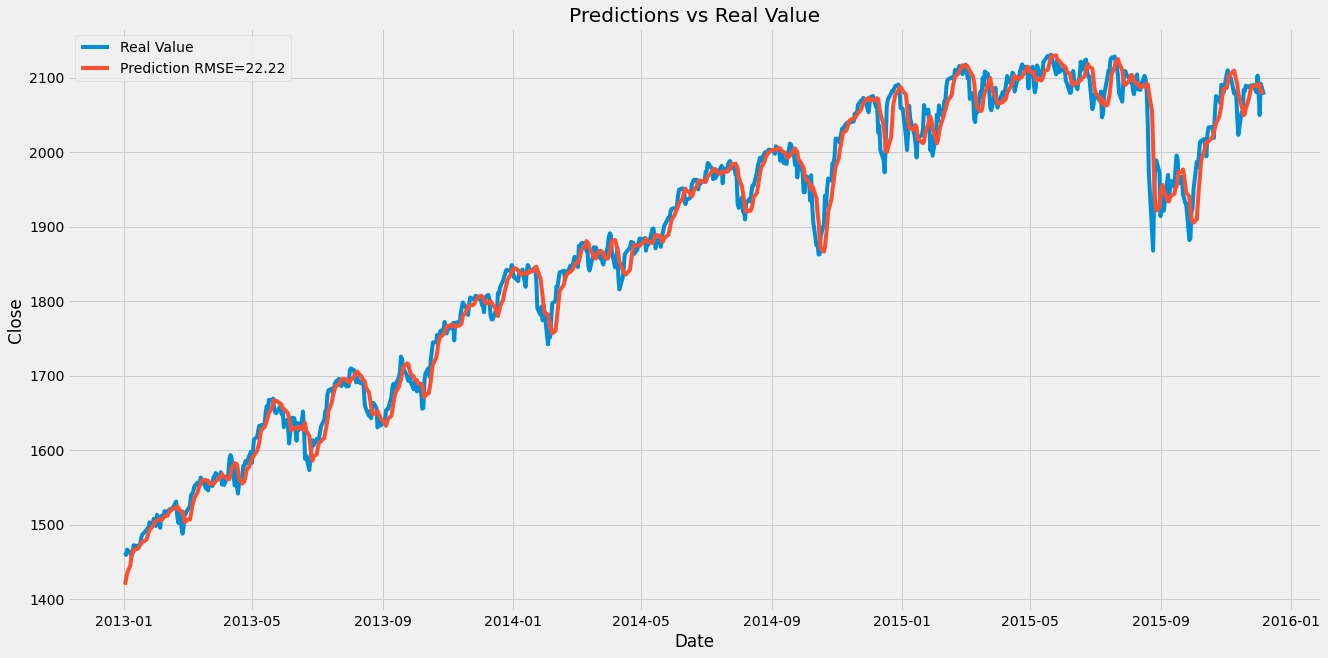

In [198]:
rmse, predictions = get_linear_regression_error(train, test, features, 'Close')
create_line_plot(test["Date"], test["Close"], predictions, rmse, sigbar_x=-17500)

In [200]:
features2 = ['last_5_days_mean',
 'last_30_days_mean',
 'last_365_days_mean',
 'last_5_days_volume_mean',
 'last_30_days_volume_mean',
 'last_365_days_volume_mean',
 'day_of_date',
 'month_of_date',
 'year_of_date',
 'day_of_week',
 'day_of_year',
 'quarter_of_year']

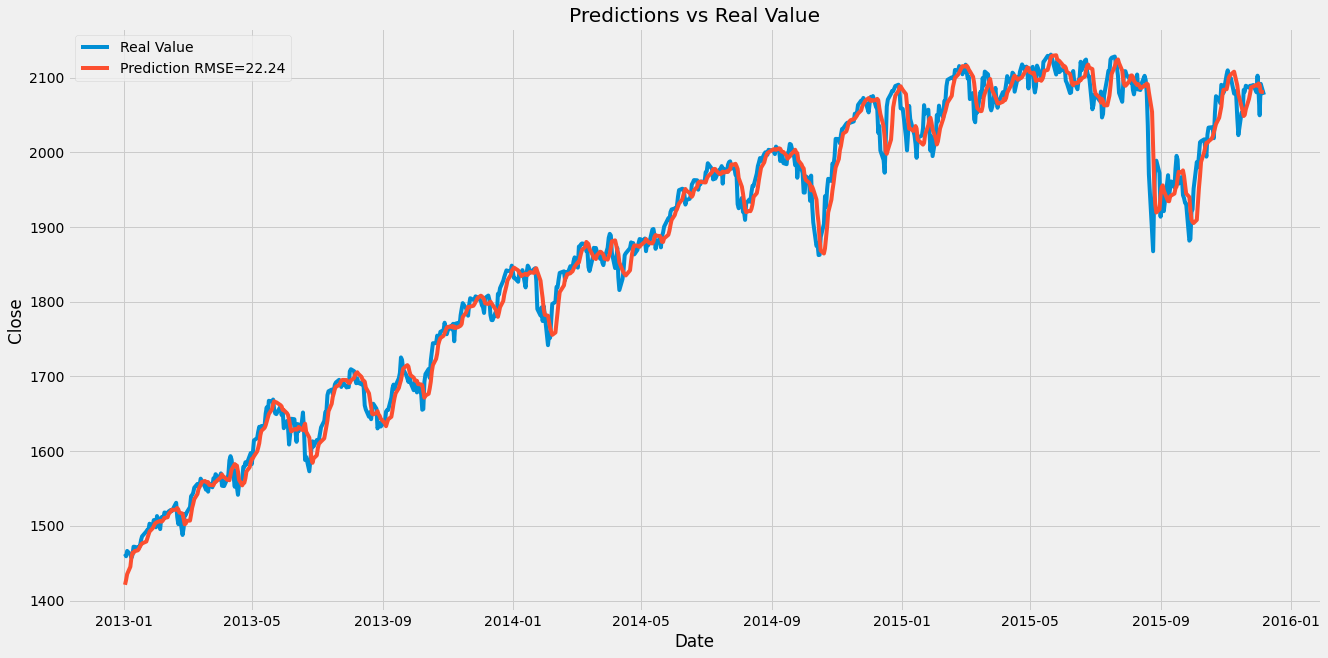

In [201]:
rmse, predictions = get_linear_regression_error(train, test, features2, 'Close')
create_line_plot(test["Date"], test["Close"], predictions, rmse, sigbar_x=-17500)